### Why RFM?
- RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
- This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.

### How?
- In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.

### Reference:
- https://www.putler.com/rfm-analysis

In [140]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [141]:
ords = pd.read_excel('Dataset.xlsx')
ords.columns = [col.lower().replace(' ', '_') for col in ords.columns]
ords.head(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,product_id,sales,quantity,unit_price,discount,profit
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,0.2,4.5188
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225,0.2,6.4750
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611,0.2,-44.2764
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326,0.2,22.6782
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251,0.0,2.9547


In [142]:
ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id       9994 non-null   int64         
 1   order_id     9994 non-null   object        
 2   order_date   9994 non-null   datetime64[ns]
 3   ship_date    9994 non-null   datetime64[ns]
 4   ship_mode    9994 non-null   object        
 5   customer_id  9994 non-null   object        
 6   channel      9994 non-null   object        
 7   postal_code  9994 non-null   int64         
 8   product_id   9994 non-null   object        
 9   sales        9994 non-null   float64       
 10  quantity     9994 non-null   int64         
 11  unit_price   9994 non-null   float64       
 12  discount     9994 non-null   float64       
 13  profit       9994 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [143]:
pro = pd.read_excel('Dataset.xlsx', sheet_name='Product')

#remove duplicate Product ID in Product table

prod = pro.drop_duplicates(subset='Product ID')
prod.columns = [col.lower().replace(' ', '_') for col in prod.columns]
prod

,row_id,product_id,category,sub-category,product_name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...
1889,1890,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,1891,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,1892,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,1893,TEC-PH-10002645,Technology,Phones,LG G2


In [144]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   row_id        1862 non-null   int64 
 1   product_id    1862 non-null   object
 2   category      1862 non-null   object
 3   sub-category  1862 non-null   object
 4   product_name  1862 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.3+ KB


In [145]:
# calculate total value of each order

groupby_order = ords.groupby(['order_id', 'order_date', 'customer_id',''], as_index=False)['sales'].sum()
groupby_order

KeyError: ''

In [146]:
#merge order & product table 
data = prod[['product_id', 'category', 'sub-category']].merge(ords, on = 'product_id', how = 'inner')
data.head()

,product_id,category,sub-category,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,sales,quantity,unit_price,discount,profit
0,FUR-BO-10001798,Furniture,Bookcases,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Consumer,19140,130.980,2,110.0232,0.50,-89.0664
1,FUR-BO-10001798,Furniture,Bookcases,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Consumer,33065,314.352,3,110.0232,0.20,-15.7176
2,FUR-BO-10001798,Furniture,Bookcases,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,42420,261.960,2,110.0232,0.00,41.9136
3,FUR-BO-10001798,Furniture,Bookcases,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Consumer,90004,556.665,5,110.0232,0.15,6.5490
4,FUR-CH-10000454,Furniture,Chairs,7390,CA-2017-108035,2017-11-29,2017-12-03,Standard Class,TT-21070,Consumer,37421,390.368,2,170.7860,0.20,48.7960


In [147]:
# load dataframe of returned orders

rtn = pd.read_excel('Dataset.xlsx', sheet_name='Return')
rtn.columns = [col.lower().replace(' ', '_') for col in rtn.columns]
rtn

,returned,order_id
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [148]:
rtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   returned  296 non-null    object
 1   order_id  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [149]:
# exclude returned orders
#merge order - chứa all order và return chứa return order lại, sau đó dùng inin và drop để lọc ra & drop những order bị return 
#groupby_order is left table, rtg is right => result return left table.
rtn_merge = data.merge(rtn, how='left', on='order_id') 
rtn_merge

,product_id,category,sub-category,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,sales,quantity,unit_price,discount,profit,returned
0,FUR-BO-10001798,Furniture,Bookcases,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Consumer,19140,130.980,2,110.0232,0.50,-89.0664,NaN
1,FUR-BO-10001798,Furniture,Bookcases,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Consumer,33065,314.352,3,110.0232,0.20,-15.7176,NaN
2,FUR-BO-10001798,Furniture,Bookcases,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,42420,261.960,2,110.0232,0.00,41.9136,NaN
3,FUR-BO-10001798,Furniture,Bookcases,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Consumer,90004,556.665,5,110.0232,0.15,6.5490,NaN
4,FUR-CH-10000454,Furniture,Chairs,7390,CA-2017-108035,2017-11-29,2017-12-03,Standard Class,TT-21070,Consumer,37421,390.368,2,170.7860,0.20,48.7960,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,TEC-PH-10002817,Technology,Phones,9522,CA-2014-169446,2014-12-19,2014-12-25,Standard Class,SG-20605,Consumer,60623,323.976,3,95.8429,0.20,36.4473,NaN
9990,TEC-MA-10003589,Technology,Machines,9563,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Consumer,43055,224.937,3,129.9636,0.70,-164.9538,NaN
9991,OFF-AP-10003099,Office Supplies,Appliances,9605,CA-2015-138625,2015-11-02,2015-11-05,First Class,EG-13900,Consumer,23320,197.720,4,35.5896,0.00,55.3616,NaN
9992,TEC-PH-10002645,Technology,Phones,9674,CA-2016-114867,2016-12-23,2016-12-28,Standard Class,FM-14290,Home Office,19143,1499.970,5,374.9925,0.40,-374.9925,NaN


In [150]:
#valid = rtn_merge[~rtn_merge['order_id'].isin(rtn['order_id'])].drop('returned', axis=1)
valid = rtn_merge[rtn_merge['order_id'].isin(rtn['order_id'])].drop('returned', axis='columns')
valid

,product_id,category,sub-category,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,sales,quantity,unit_price,discount,profit
26,FUR-TA-10000577,Furniture,Tables,4193,CA-2015-150875,2015-11-16,2015-11-20,Standard Class,HK-14890,Corporate,83704,696.420,2,268.1217,0.0,160.1766
70,FUR-TA-10001539,Furniture,Tables,3338,US-2017-109253,2017-08-21,2017-08-22,First Class,PR-18880,Consumer,94601,568.728,3,180.0972,0.2,28.4364
72,FUR-TA-10001539,Furniture,Tables,9237,CA-2016-126732,2016-09-02,2016-09-06,Standard Class,LR-16915,Consumer,90036,568.728,3,180.0972,0.2,28.4364
101,OFF-AP-10002311,Office Supplies,Appliances,9315,CA-2015-111948,2015-11-11,2015-11-11,Same Day,AG-10495,Corporate,48234,123.858,2,38.5336,0.1,46.7908
127,OFF-AR-10003056,Office Supplies,Art,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Consumer,94109,8.560,2,3.0388,0.0,2.4824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,TEC-MA-10001695,Technology,Machines,7642,US-2016-157490,2016-10-06,2016-10-07,First Class,LB-16795,Home Office,81001,703.710,6,273.6650,0.7,-938.2800
9965,OFF-SU-10004290,Office Supplies,Supplies,8367,CA-2014-109918,2014-09-07,2014-09-12,Second Class,LR-17035,Corporate,95051,27.360,4,4.9932,0.0,7.3872
9967,OFF-PA-10000312,Office Supplies,Paper,8703,CA-2017-119284,2017-06-15,2017-06-20,Standard Class,TS-21205,Corporate,37211,91.360,5,12.3336,0.2,29.6920
9972,TEC-MA-10002694,Technology,Machines,8873,US-2014-105137,2014-10-10,2014-10-10,Same Day,RB-19435,Consumer,43229,101.994,2,86.6949,0.7,-71.3958


In [151]:
today = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')
print(today)

2017-12-31 00:00:00


In [152]:
rfm = valid.groupby(['customer_id','category','sub-category']).agg({'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}).reset_index()
rfm.columns = ['customer_id', 'category','sub-category','max_date', 'frequency', 'monetary']
rfm

,customer_id,category,sub-category,max_date,frequency,monetary
0,AA-10645,Office Supplies,Paper,2017-11-05,1,12.960
1,AB-10105,Office Supplies,Binders,2017-09-19,1,18.180
2,AB-10105,Office Supplies,Storage,2017-09-19,1,12.624
3,AB-10105,Technology,Accessories,2017-09-19,1,89.584
4,AB-10105,Technology,Phones,2017-09-19,1,471.920
...,...,...,...,...,...,...
688,ZC-21910,Office Supplies,Paper,2016-03-20,2,31.104
689,ZC-21910,Technology,Phones,2016-03-20,1,84.784
690,ZD-21925,Office Supplies,Art,2014-08-27,1,8.560
691,ZD-21925,Office Supplies,Binders,2014-08-27,1,22.720


In [153]:
# calculate r value, f value, and m value for successful orders

rfm = valid.groupby(['customer_id','category','sub-category']).agg({'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}).reset_index()
rfm.columns = ['customer_id', 'category','sub-category', 'max_date', 'frequency', 'monetary']
rfm['recency'] = (today - rfm['max_date']).dt.days
rfm = rfm.drop('max_date', axis=1)
rfm = rfm[['customer_id','category','sub-category', 'recency', 'frequency', 'monetary']]
rfm

,customer_id,category,sub-category,recency,frequency,monetary
0,AA-10645,Office Supplies,Paper,56,1,12.960
1,AB-10105,Office Supplies,Binders,103,1,18.180
2,AB-10105,Office Supplies,Storage,103,1,12.624
3,AB-10105,Technology,Accessories,103,1,89.584
4,AB-10105,Technology,Phones,103,1,471.920
...,...,...,...,...,...,...
688,ZC-21910,Office Supplies,Paper,651,2,31.104
689,ZC-21910,Technology,Phones,651,1,84.784
690,ZD-21925,Office Supplies,Art,1222,1,8.560
691,ZD-21925,Office Supplies,Binders,1222,1,22.720


In [154]:
rfm['r_score']  = pd.qcut(rfm['recency'].rank(method='first'), q=5, labels=range(5,0,-1))

rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=range(1,6))

rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), q=5, labels=range(1,6))

rfm

,customer_id,category,sub-category,recency,frequency,monetary,r_score,f_score,m_score
0,AA-10645,Office Supplies,Paper,56,1,12.960,5,1,1
1,AB-10105,Office Supplies,Binders,103,1,18.180,5,1,1
2,AB-10105,Office Supplies,Storage,103,1,12.624,5,1,1
3,AB-10105,Technology,Accessories,103,1,89.584,5,1,3
4,AB-10105,Technology,Phones,103,1,471.920,5,1,5
...,...,...,...,...,...,...,...,...,...
688,ZC-21910,Office Supplies,Paper,651,2,31.104,3,5,2
689,ZC-21910,Technology,Phones,651,1,84.784,3,5,3
690,ZD-21925,Office Supplies,Art,1222,1,8.560,1,5,1
691,ZD-21925,Office Supplies,Binders,1222,1,22.720,1,5,2


In [155]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)
rfm

,customer_id,category,sub-category,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,AA-10645,Office Supplies,Paper,56,1,12.960,5,1,1,511
1,AB-10105,Office Supplies,Binders,103,1,18.180,5,1,1,511
2,AB-10105,Office Supplies,Storage,103,1,12.624,5,1,1,511
3,AB-10105,Technology,Accessories,103,1,89.584,5,1,3,513
4,AB-10105,Technology,Phones,103,1,471.920,5,1,5,515
...,...,...,...,...,...,...,...,...,...,...
688,ZC-21910,Office Supplies,Paper,651,2,31.104,3,5,2,352
689,ZC-21910,Technology,Phones,651,1,84.784,3,5,3,353
690,ZD-21925,Office Supplies,Art,1222,1,8.560,1,5,1,151
691,ZD-21925,Office Supplies,Binders,1222,1,22.720,1,5,2,152


In [156]:
#define custom label theo rfm segemnt 
def label (value):
    if value in set ((555, 554, 544, 545, 454, 455, 445)) : 
        return "Champions"
    elif value in set ((543, 444, 435, 355, 354, 345, 344, 335)) : 
        return "Loyal"
    elif value in set ((553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323)) :
        return "Potential Loyalist"
    elif value in set ((512, 511, 422, 421, 412, 411, 311)) : 
        return "New Customers"
    elif value in set ((525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313)) :
        return "Promising"
    elif value in set ((535, 534, 443, 434, 343, 334, 325, 324)) :
        return "Need Attention"
    elif value in set ((331, 321, 312, 221, 213, 231, 241, 251)) :
        return "About To Sleep"
    elif value in set ((255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124)) :
        return "At Risk"
    elif value in set ((155, 154, 144, 214,215,115, 114, 113)) : 
        return "Cannot Lose Them"
    elif value in set ((332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211)) :
        return "Hibernating customers" 
    elif value in set ((111, 112, 121, 131, 141, 151)):
        return "Lost customers"

rfm['segment'] = rfm['rfm_score'].map(label)
rfm

,customer_id,category,sub-category,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,AA-10645,Office Supplies,Paper,56,1,12.960,5,1,1,511,New Customers
1,AB-10105,Office Supplies,Binders,103,1,18.180,5,1,1,511,New Customers
2,AB-10105,Office Supplies,Storage,103,1,12.624,5,1,1,511,New Customers
3,AB-10105,Technology,Accessories,103,1,89.584,5,1,3,513,Promising
4,AB-10105,Technology,Phones,103,1,471.920,5,1,5,515,Promising
...,...,...,...,...,...,...,...,...,...,...,...
688,ZC-21910,Office Supplies,Paper,651,2,31.104,3,5,2,352,Potential Loyalist
689,ZC-21910,Technology,Phones,651,1,84.784,3,5,3,353,Potential Loyalist
690,ZD-21925,Office Supplies,Art,1222,1,8.560,1,5,1,151,Lost customers
691,ZD-21925,Office Supplies,Binders,1222,1,22.720,1,5,2,152,At Risk


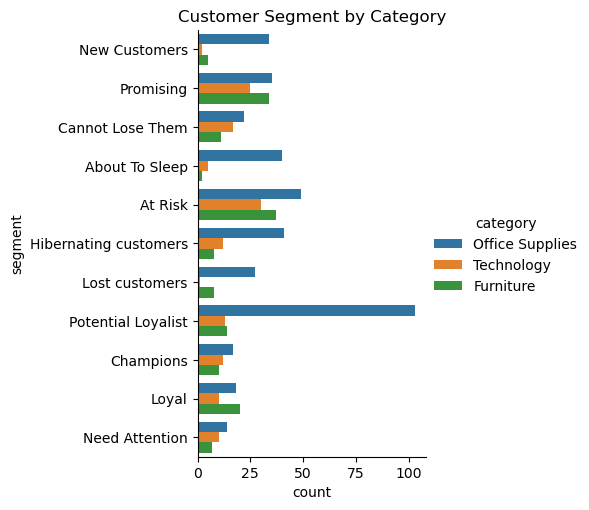

In [158]:
### VISUALIZATION CHART 

#Customer Segment by dimension

import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(y='segment', data=rfm, hue = 'category', kind = 'count').set(title='Customer Segment by Category')

plt.show()  

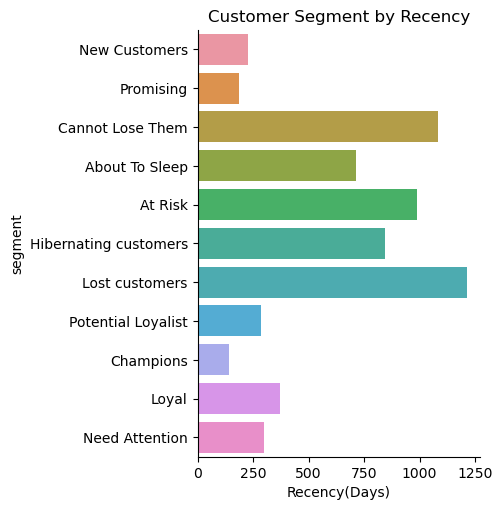

In [159]:
#Customer Segment by Recency

sns.catplot(x = 'recency', y = 'segment', data = rfm, kind = 'bar', ci = None).set(title='Customer Segment by Recency',xlabel='Recency(Days)')

plt.show()  

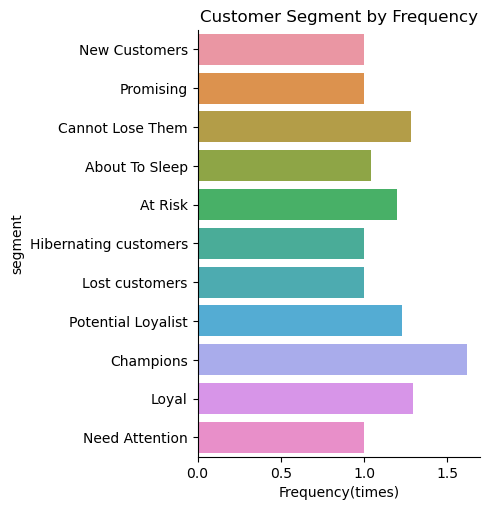

In [160]:
#Customer Segment by Frequency

sns.catplot(x = 'frequency', y = 'segment', data = rfm, kind = 'bar', ci = None).set(title='Customer Segment by Frequency',xlabel='Frequency(times)')

plt.show() 

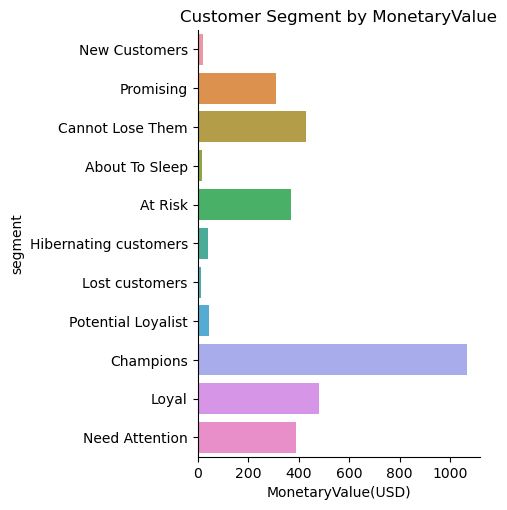

In [161]:
#Customer Segment by MonetaryValue

sns.catplot(x = 'monetary', y = 'segment', data = rfm, kind = 'bar', ci = None).set(title='Customer Segment by MonetaryValue',xlabel='MonetaryValue(USD)')

plt.show()  

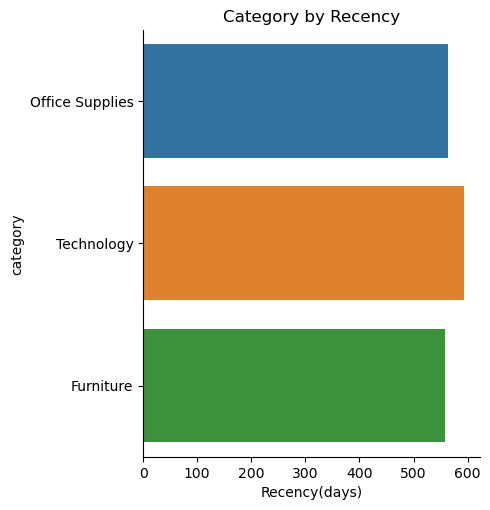

In [162]:
#Category by dimension

#Category by MonetaryValue

sns.catplot(x = 'recency', y = 'category', data = rfm, kind = 'bar', ci = None).set(title='Category by Recency',xlabel='Recency(days)')

plt.show()  

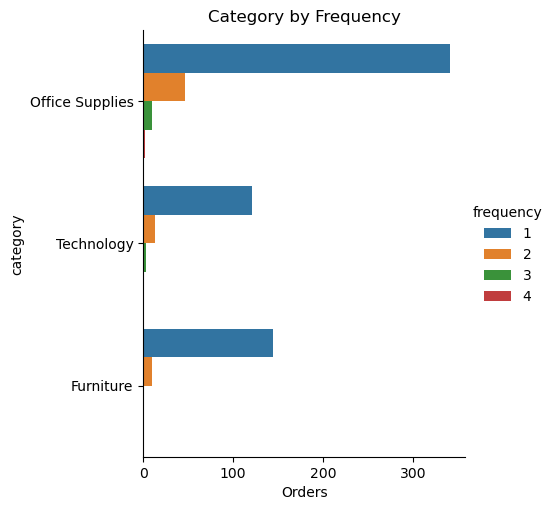

In [163]:
#Category by Frequency

sns.catplot(y = 'category', hue = 'frequency', data = rfm, kind = 'count').set(title='Category by Frequency',xlabel='Orders')

plt.show()  

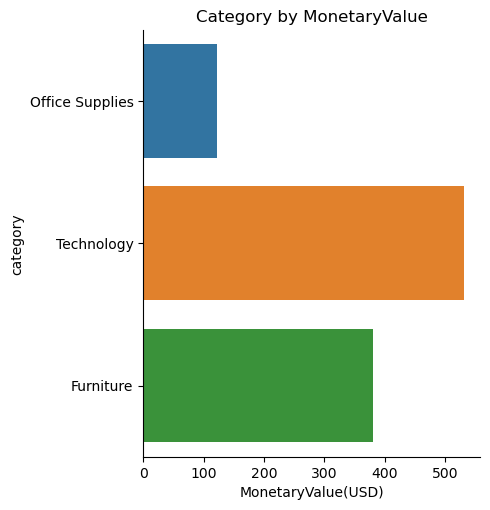

In [129]:
#Category by MonetaryValue

sns.catplot(x = 'monetary', y = 'category', data = rfm, kind = 'bar', ci = None).set(title='Category by MonetaryValue',xlabel='MonetaryValue(USD)')

plt.show()  

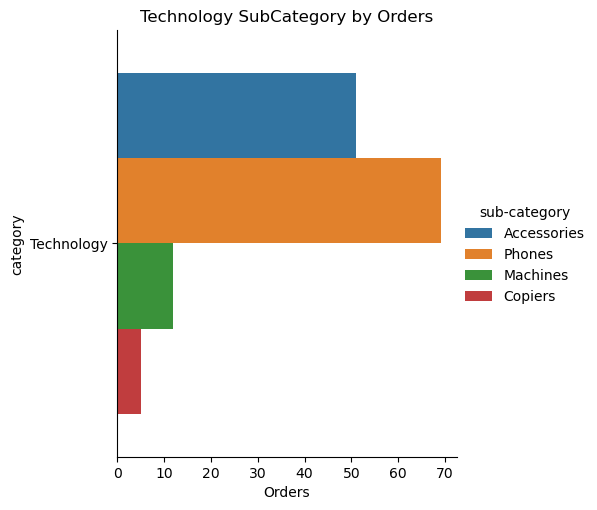

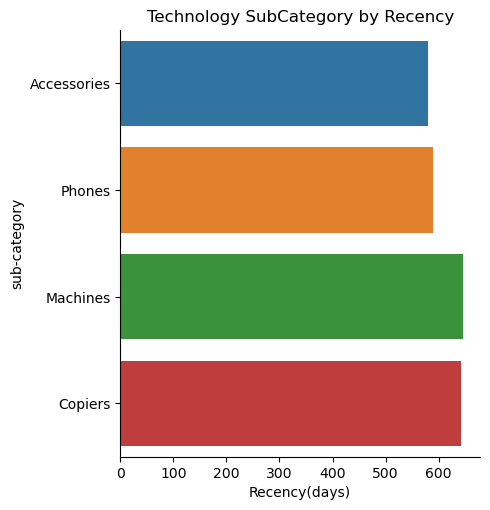

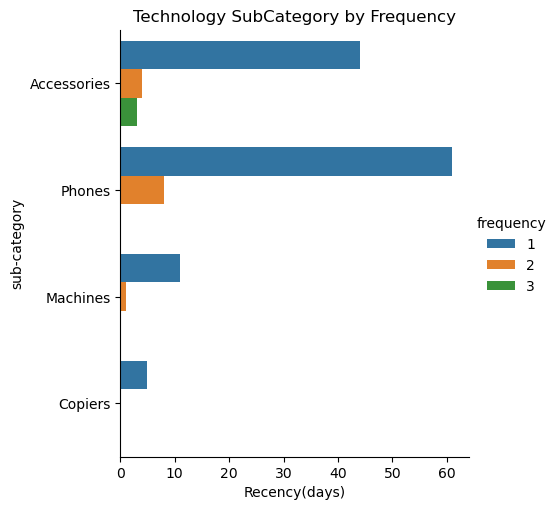

In [130]:
#Subcategory by dimension

tech = rfm[rfm['category'] == 'Technology']

sns.catplot(y = 'category', data = tech, kind = 'count', hue = 'sub-category').set(title='Technology SubCategory by Orders',xlabel='Orders')

plt.show()  

sns.catplot(x = 'recency', y = 'sub-category', data = tech, kind = 'bar', ci = None).set(title='Technology SubCategory by Recency',xlabel='Recency(days)')

plt.show()  

sns.catplot(y = 'sub-category', hue = 'frequency', data = tech, kind = 'count').set(title='Technology SubCategory by Frequency',xlabel='Recency(days)')

plt.show() 


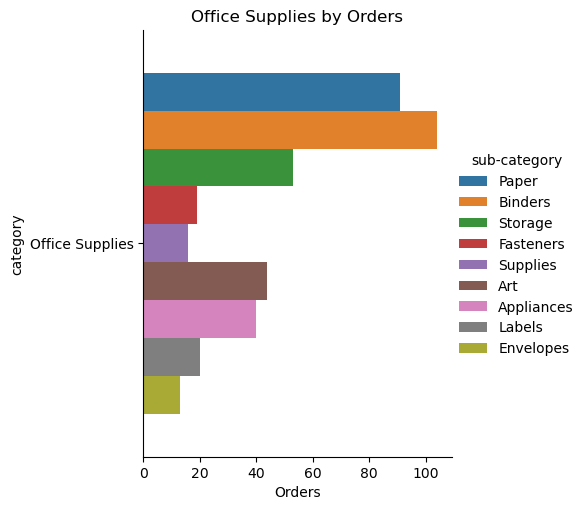

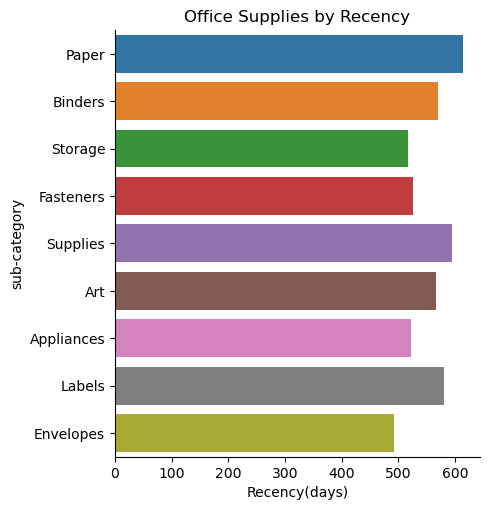

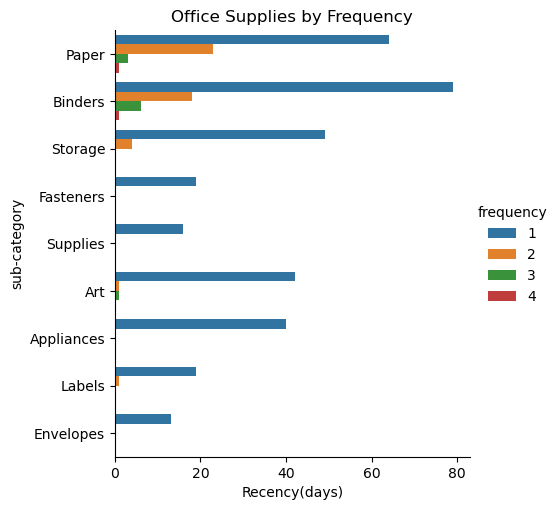

In [131]:
office = rfm[rfm['category'] == 'Office Supplies']

sns.catplot(y = 'category', data = office, kind = 'count', hue = 'sub-category').set(title='Office Supplies by Orders',xlabel='Orders')

plt.show()  

sns.catplot(x = 'recency', y = 'sub-category', data = office, kind = 'bar', ci = None).set(title='Office Supplies by Recency',xlabel='Recency(days)')

plt.show()  

sns.catplot(y = 'sub-category', hue = 'frequency', data = office, kind = 'count').set(title='Office Supplies by Frequency',xlabel='Recency(days)')

plt.show() 

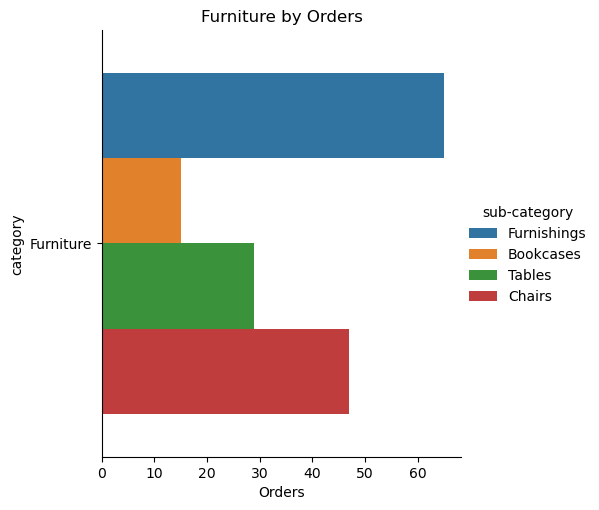

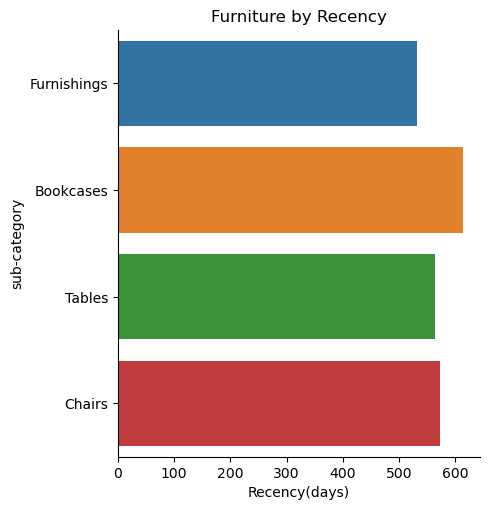

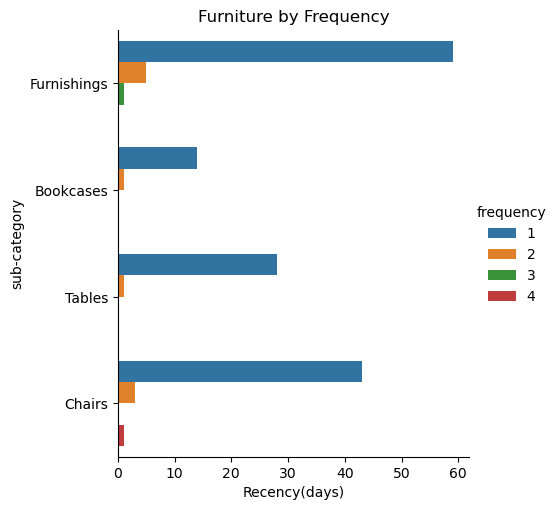

In [132]:
fur = rfm[rfm['category'] == 'Furniture']

sns.catplot(y = 'category', data = fur, kind = 'count', hue = 'sub-category').set(title='Furniture by Orders',xlabel='Orders')

plt.show()  

sns.catplot(x = 'recency', y = 'sub-category', data = fur, kind = 'bar', ci = None).set(title='Furniture by Recency',xlabel='Recency(days)')

plt.show()  

sns.catplot(y = 'sub-category', hue = 'frequency', data = fur, kind = 'count').set(title='Furniture by Frequency',xlabel='Recency(days)')

plt.show() 